In [9]:
#! /usr/bin/env python

# PonyGE2
# Copyright (c) 2017 Michael Fenton, James McDermott,
#                    David Fagan, Stefan Forstenlechner,
#                    and Erik Hemberg
# Hereby licensed under the GNU GPL v3.
""" Python GE implementation """

from utilities.algorithm.general import check_python_version

check_python_version()
import matplotlib
matplotlib.use('Qt5Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from stats.stats import get_stats
from algorithm.parameters import params, set_params
import sys
import time
import numpy as np
np.set_printoptions(linewidth=150)
import random
import os
import pickle

from utilities.stats import trackers


In [26]:
file_path = f"./results_data/results_data_fold_1.pkl"

# Load the data
with open(file_path, 'rb') as f:
    loaded_data = pickle.load(f)

# Access the loaded data
hyperparam = loaded_data['hyperparam']
hyperparam_list = hyperparam['list']
seeds = loaded_data['seeds']
test_results = loaded_data['test_results']
train_results = loaded_data['train_results']
test_evolution = loaded_data['test_evolution']
train_evolution = loaded_data['train_evolution']

print("The analyzed hyperparameters are:", hyperparam['name'])

print("Hyperparam:", hyperparam_list)
print("Seeds:", seeds)
print("Test results shape:", test_results.shape)
print("Train results shape:", train_results.shape)
print("Test evolution shape:", test_evolution.shape)
print("Train evolution shape:", train_evolution.shape)


The analyzed hyperparameters are: MUTATION_PROBABILITY
Hyperparam: [0.  0.1 0.2 0.3 0.4]
Seeds: [169451892 216638540  78310321 181624395   4317235]
Test results shape: (5, 5)
Train results shape: (5, 5)
Test evolution shape: (5, 5, 76)
Train evolution shape: (5, 5, 76)


VALUES FOR FOLD 1
SEED is 169451892
MUT_Value 0.0


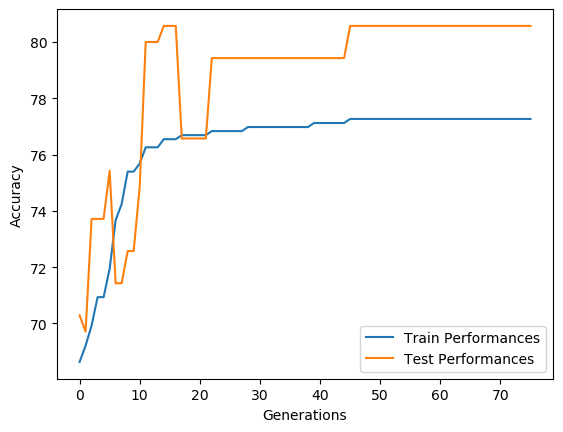

SEED is 216638540
MUT_Value 0.1


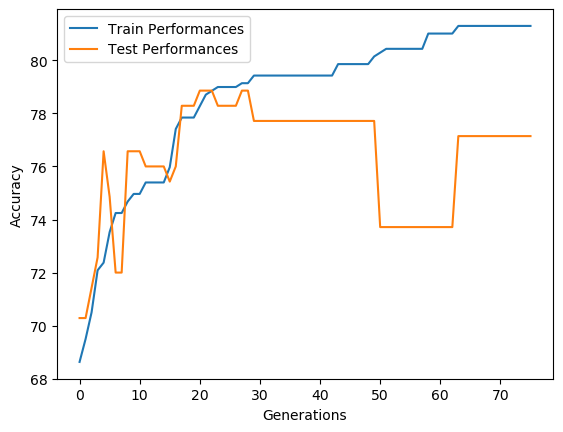

SEED is 78310321
MUT_Value 0.2


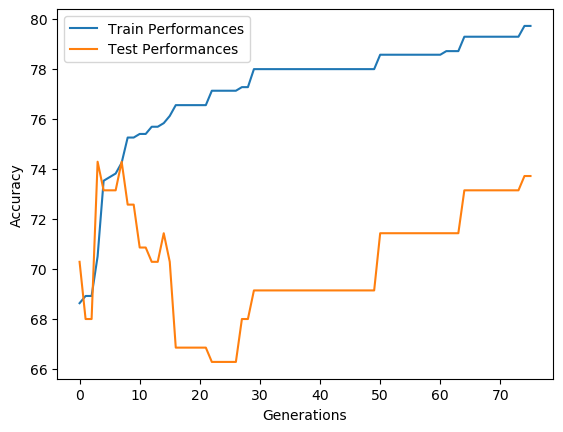

SEED is 181624395
MUT_Value 0.30000000000000004


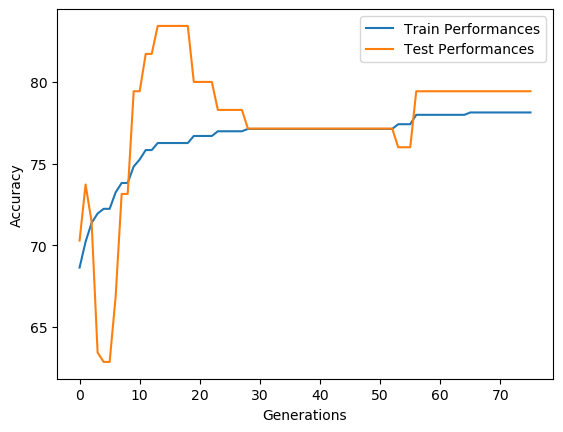

SEED is 4317235
MUT_Value 0.4


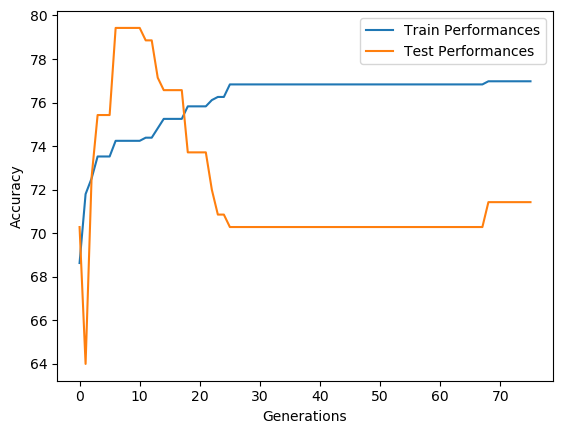

VALUES FOR FOLD 2
SEED is 169451892
MUT_Value 0.0


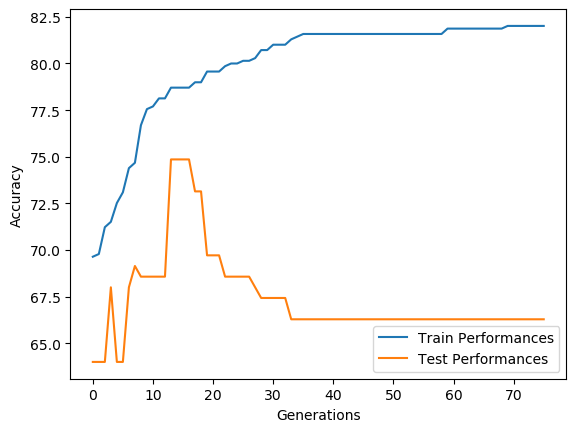

SEED is 216638540
MUT_Value 0.1


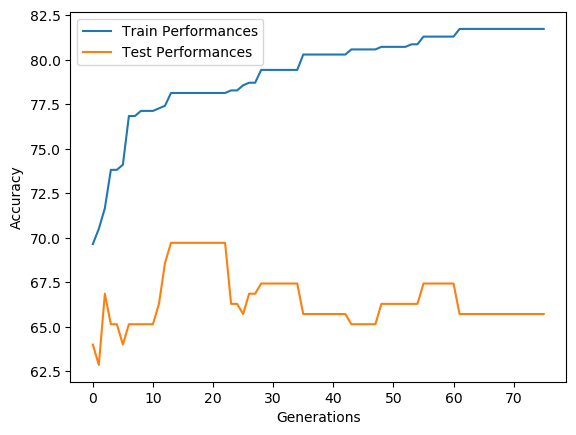

SEED is 78310321
MUT_Value 0.2


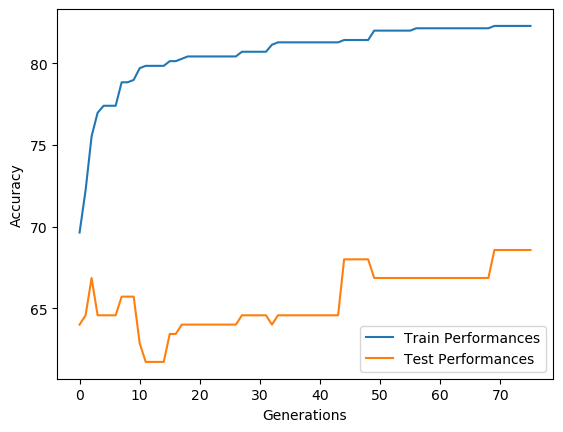

SEED is 181624395
MUT_Value 0.30000000000000004


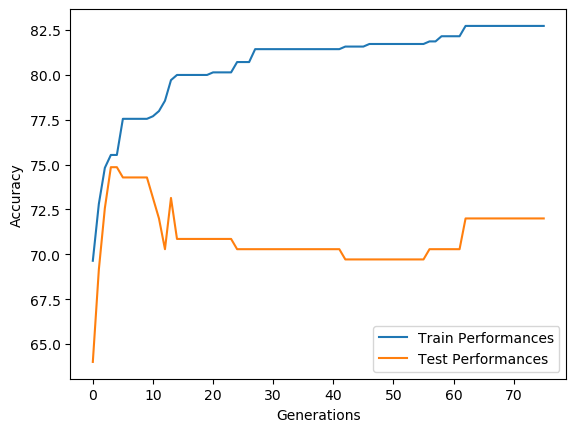

SEED is 4317235
MUT_Value 0.4


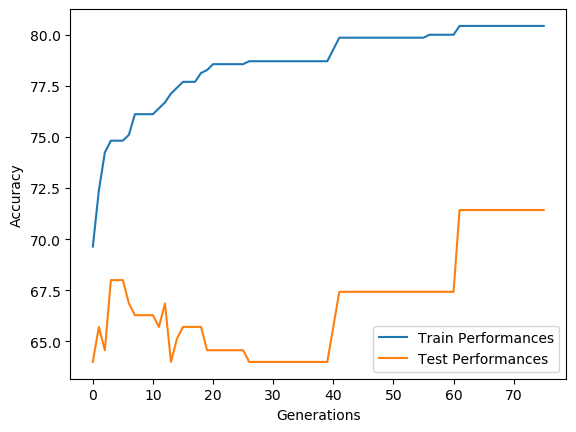

VALUES FOR FOLD 3
SEED is 169451892
MUT_Value 0.0


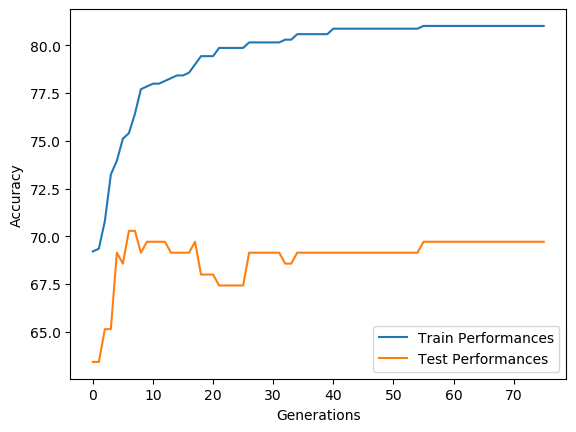

SEED is 216638540
MUT_Value 0.1


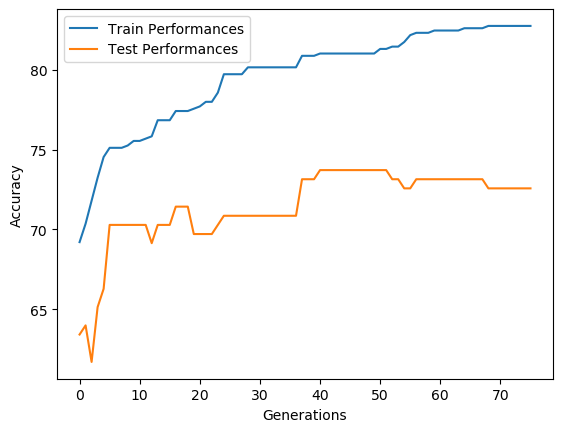

SEED is 78310321
MUT_Value 0.2


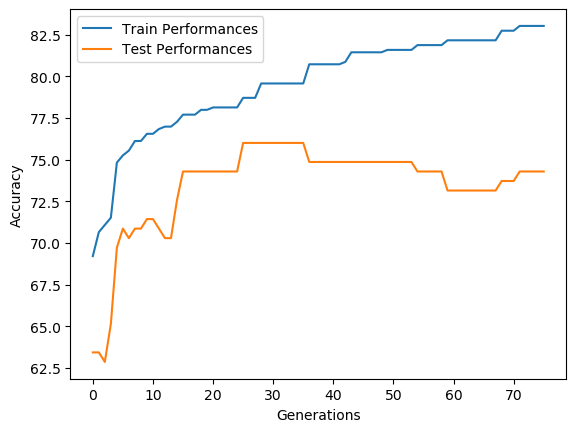

SEED is 181624395
MUT_Value 0.30000000000000004


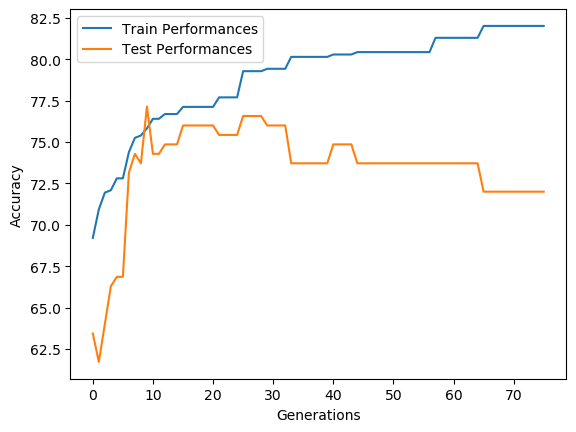

SEED is 4317235
MUT_Value 0.4


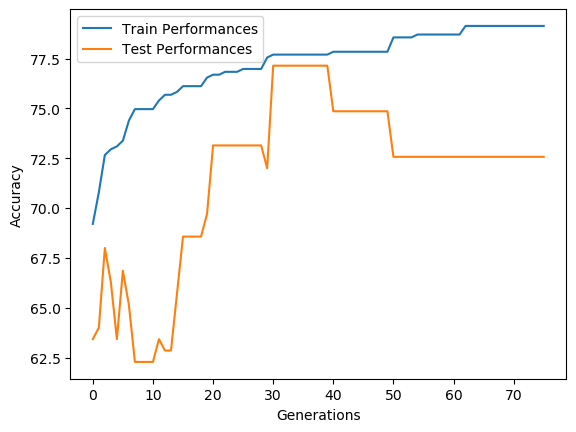

VALUES FOR FOLD 4
SEED is 169451892
MUT_Value 0.0


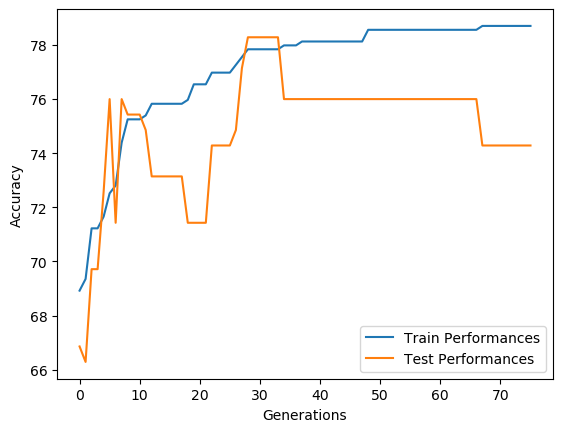

SEED is 216638540
MUT_Value 0.1


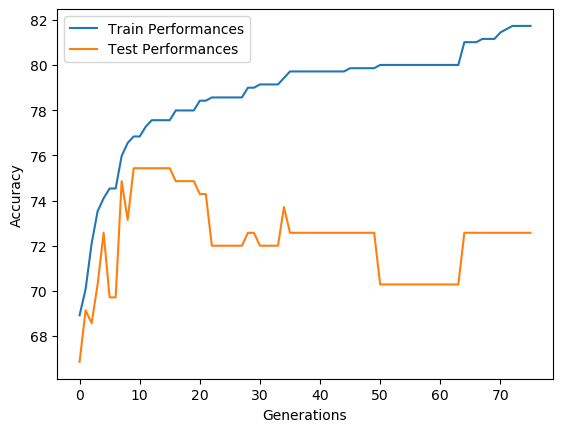

SEED is 78310321
MUT_Value 0.2


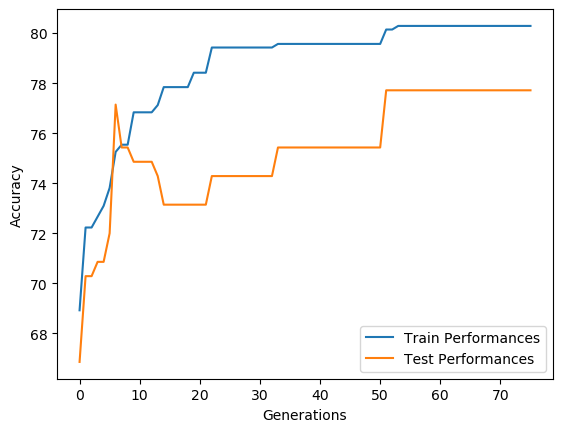

SEED is 181624395
MUT_Value 0.30000000000000004


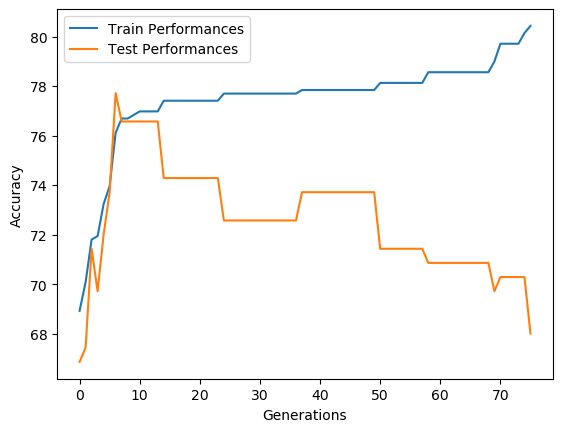

SEED is 4317235
MUT_Value 0.4


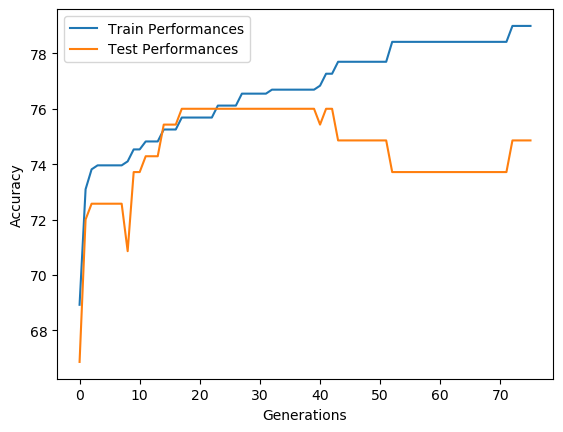

VALUES FOR FOLD 5
SEED is 169451892
MUT_Value 0.0


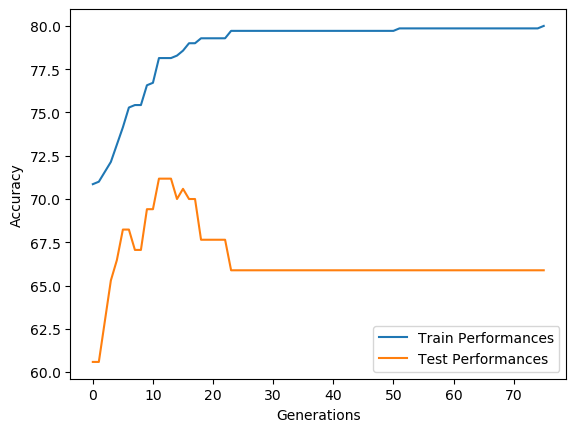

SEED is 216638540
MUT_Value 0.1


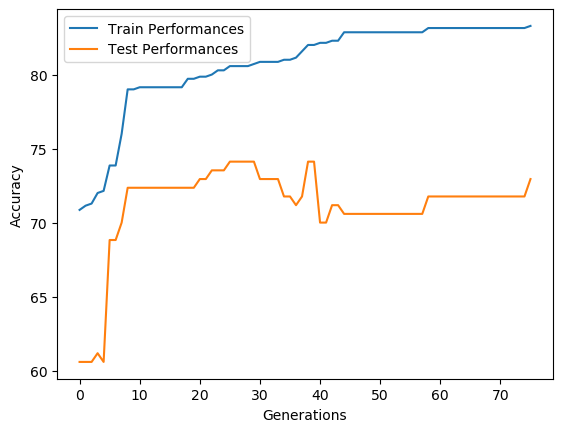

SEED is 78310321
MUT_Value 0.2


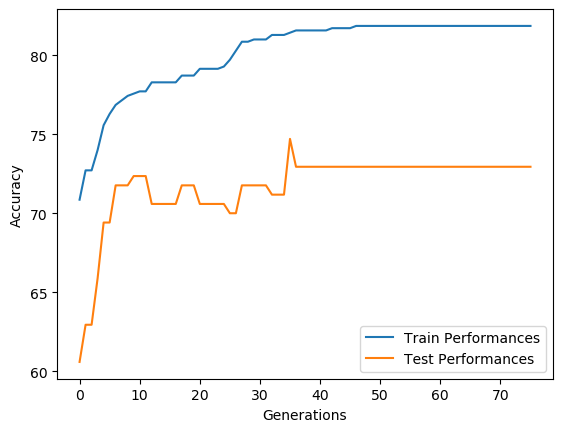

SEED is 181624395
MUT_Value 0.30000000000000004


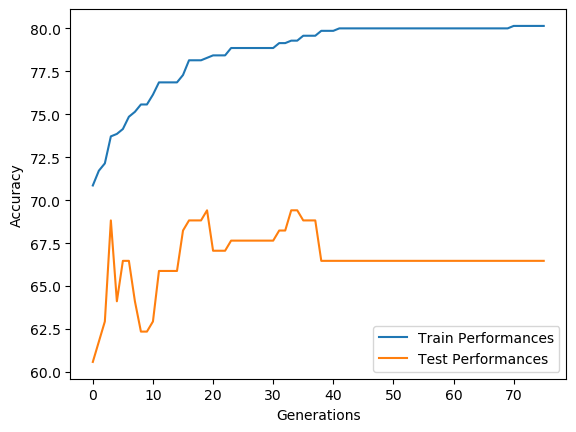

SEED is 4317235
MUT_Value 0.4


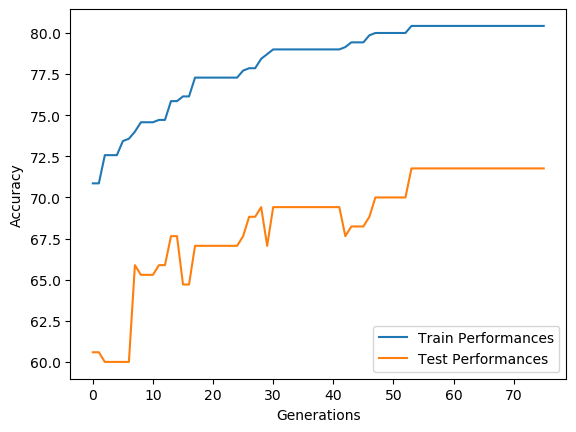

In [39]:
for i in range(5):
    file_path = f"./results_data/results_data_fold_{str(i+1)}.pkl"

    with open(file_path, 'rb') as f:
        loaded_data = pickle.load(f)

    # Access the loaded data
    hyperparam = loaded_data['hyperparam']
    hyperparam_list = hyperparam['list']
    seeds = loaded_data['seeds']
    test_results = loaded_data['test_results']
    train_results = loaded_data['train_results']
    test_evolution = loaded_data['test_evolution']
    train_evolution = loaded_data['train_evolution']

    avg_train_evoltion = np.mean(train_evolution, axis = 0)
    avg_test_evolution = np.mean(test_evolution, axis = 0)

    print("VALUES FOR FOLD",i+1)
    for j in range(test_evolution.shape[1]):
        
        print("SEED is", seeds[j])
        print("MUT_Value", hyperparam_list[j])
        #plt.plot(train_evolution[0][j], label = "Train Performances")
        #plt.plot(test_evolution[0][j], label = "Test Performances")
        #avg_train_evoltion = np.mean(train_evolution, axis=0)
        #avg_test_evolution = np.mean(test_evolution, axis = 0)
        plt.plot(avg_train_evoltion[j], label = "Train Performances")
        plt.plot(avg_test_evolution[j], label = "Test Performances")
        plt.legend()
        
        plt.xlabel("Generations")
        plt.ylabel("Accuracy")

        plt.show()


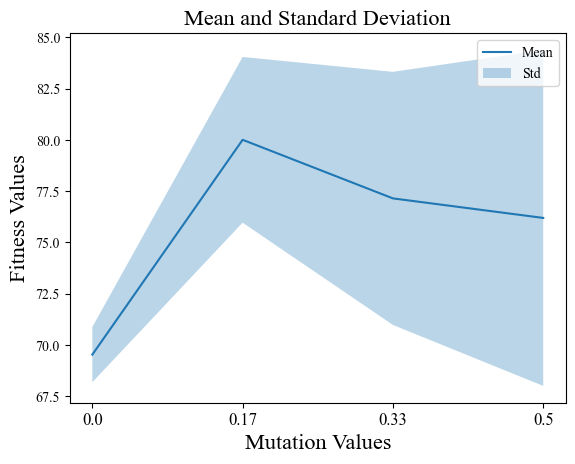

In [10]:
matplotlib.use('Qt5Agg')
%matplotlib inline


# Generate mutation values
mean = np.mean(test_results, axis = 0)
std = np.std(test_results, axis = 0)

# Plot mean and standard deviation
plt.plot(hyperparam_list, mean, label="Mean")
plt.fill_between(hyperparam_list, mean - std, mean + std, alpha=0.3, label="Std")

# Set axis labels and title
plt.xlabel("Mutation Values", fontsize=16)
plt.ylabel("Fitness Values", fontsize=16)
plt.title("Mean and Standard Deviation", fontsize=16)

# Set xticks to display actual values of mutation_values rounded to 2 decimal places
rounded_x = np.round(hyperparam_list, 2)
plt.xticks(hyperparam_list, rounded_x, fontsize = 12)

# Add legend and display the plot
plt.legend()
plt.show()


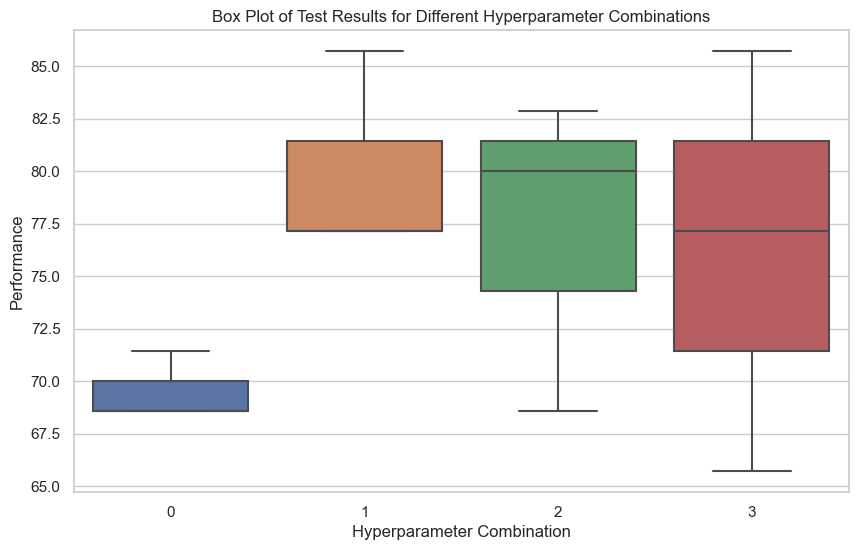

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_results is a 2D numpy array with shape (num_seeds, num_hyperparams)

# Calculate the average performance across seeds (axis 0)
avg_test_results = np.mean(test_results, axis=0)


# Set up the box plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=test_results)

# Set plot labels and title
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Performance')
plt.title('Box Plot of Test Results for Different Hyperparameter Combinations')

# Show the plot
plt.show()


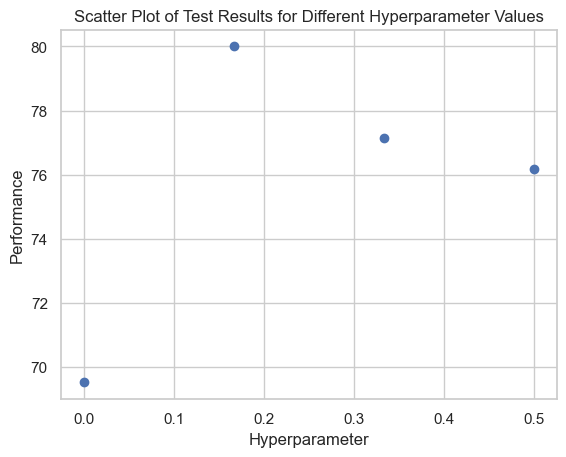

In [24]:
import matplotlib.pyplot as plt

# Assuming avg_test_results is a 1D numpy array with shape (num_hyperparams,)
# and hyperparam_values is a 1D numpy array with the hyperparameter values

# Create a scatter plot
plt.scatter(hyperparam_list, avg_test_results)

# Set plot labels and title
plt.xlabel('Hyperparameter')
plt.ylabel('Performance')
plt.title('Scatter Plot of Test Results for Different Hyperparameter Values')

# Show the plot
plt.show()


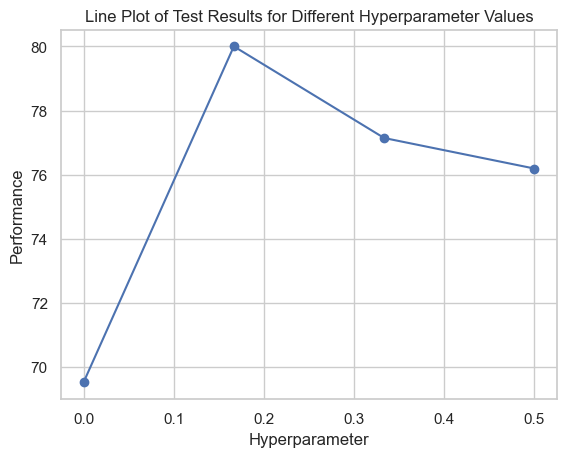

In [26]:
# Create a line plot
plt.plot(hyperparam_list, avg_test_results, marker='o')

# Set plot labels and title
plt.xlabel('Hyperparameter')
plt.ylabel('Performance')
plt.title('Line Plot of Test Results for Different Hyperparameter Values')

# Show the plot
plt.show()


(5, 5, 76)
(5, 76)
[68.63309353 69.20863309 69.92805755 70.9352518  70.9352518  71.94244604 73.66906475 74.24460432 75.39568345 75.39568345 75.68345324 76.25899281
 76.25899281 76.25899281 76.54676259 76.54676259 76.54676259 76.69064748 76.69064748 76.69064748 76.69064748 76.69064748 76.83453237 76.83453237
 76.83453237 76.83453237 76.83453237 76.83453237 76.97841727 76.97841727 76.97841727 76.97841727 76.97841727 76.97841727 76.97841727 76.97841727
 76.97841727 76.97841727 76.97841727 77.12230216 77.12230216 77.12230216 77.12230216 77.12230216 77.12230216 77.26618705 77.26618705 77.26618705
 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705
 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705 77.26618705
 77.26618705 77.26618705 77.26618705 77.26618705]


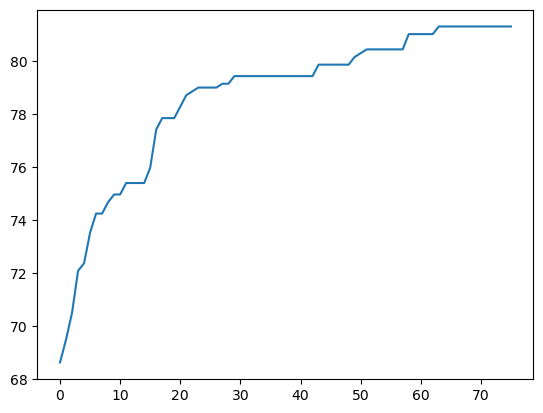

In [29]:

print(train_evolution.shape)
agg_train_evolution = np.mean(train_evolution, axis=0)
print(agg_train_evolution.shape)

print(agg_train_evolution[0])


plt.plot(agg_train_evolution[1])
plt.show()